In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.keras.datasets import fashion_mnist
from keras.utils import np_utils
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
from tensorflow.python.ops.numpy_ops.np_math_ops import log
import matplotlib.pyplot as plt
import numpy as np
from functools import wraps
from time import time
print(tf.__version__)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100



2.8.0


In [ ]:
def get_data():

  (x_train, _), (x_test, _) = fashion_mnist.load_data()
  # Normalize train and test data
  x_train = x_train.astype('float32') / 255.
  x_test = x_test.astype('float32') / 255.

  # Reshape so that each instance is a linear array of 784 normalized pixel values
  x_train = x_train.reshape((len(x_train), 784))
  x_test = x_test.reshape((len(x_test), 784))
  # print (x_train.shape, x_test.shape)

  # Add random noise to the image
  noise_factor = 0.2
  x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
  x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

  # Clip the resulting values so that they don't fall outside the upper and lower normalized value of 0 and 1
  x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
  x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

  return x_train, x_test, x_train_noisy, x_test_noisy


In [ ]:
def forward_pass(X, W1, B1, W2, B2, W3, B3, W4, B4, W5, B5, W6, B6):
  """ 
  Performs forward pass for the neural network
  """

def forward_pass(X, W1, B1, W2, B2, W3, B3, W4, B4, W5, B5, W6, B6):
  #Layer1, ReLu activation with 300 neurons
  Z1 = tf.matmul(X,tf.transpose(W1)) + B1
  A1 = Activation('relu')(Z1) #shape 60,000 X 200

  #Layer1, ReLu activation with 300 neurons
  Z2 = tf.matmul(A1,tf.transpose(W2)) + B2
  A2 = Activation('relu')(Z2) #shape 60,000 X 200

  #Layer1, ReLu activation with 300 neurons
  Z3 = tf.matmul(A2,tf.transpose(W3)) + B3
  A3 = Activation('relu')(Z3) #shape 60,000 X 200

  #Layer1, ReLu activation with 300 neurons
  Z4 = tf.matmul(A3,tf.transpose(W4)) + B4
  A4 = Activation('relu')(Z4) #shape 60,000 X 200

  #Layer1, ReLu activation with 300 neurons
  Z5 = tf.matmul(A4,tf.transpose(W5)) + B5
  A5 = Activation('relu')(Z5) #shape 60,000 X 200

  #Layer3, SoftMax layer with 10 neurons (10 classes)
  Z6 = tf.matmul(A5, tf.transpose(W6)) + B6
  A6 = tf.sigmoid(Z6)   
  # print(A6.shape)
  
  # print(tf.reduce_sum(A3, axis=-1)) # checking if the probabilities add to 1 on all rows
  

  return A6

In [ ]:
def mean_absolute_error(x_denoised, x_train):
  """
  Calculate the mean absolute error between x_denoised and x_train
  Returns float32 value
  """
  # mae = tf.reduce_mean(tf.reduce_sum(tf.abs(x_train-x_denoised), axis=-1)/784, axis=0)
  mae = tf.reduce_mean(tf.abs(x_denoised - x_train))
  return mae

In [ ]:
def display(denoised, og, epocNo):
  n = round(tf.random.uniform([10],minval = 0, maxval = 10000,dtype=tf.dtypes.int32))
  plt.figure(figsize=(20, 4))

  for i in range(len(n)):
      # Display reconstruction
      ax = plt.subplot(2, len(n), i + 1)
      plt.imshow(denoised[n[i]].numpy().reshape(28, 28))
      plt.gray()
      plt.tight_layout()
      # ax.get_xaxis().set_visible(False)
      # ax.get_yaxis().set_visible(False)
      # Turn off tick labels
      ax.set_yticklabels([])
      ax.set_xticklabels([])
      ylable = "Denoised image"
      xlable = "Epoch: "+str(epocNo) 
      ax.set_ylabel(ylable) 
      ax.set_xlabel(xlable) 

      # Display original
      ax = plt.subplot(2, len(n), i + 1 + len(n))
      ax = plt.subplot(2, len(n), i + 1 + len(n))
      plt.imshow(og[n[i]].reshape(28, 28))
      plt.gray()
      plt.tight_layout()
      # ax.get_xaxis().set_visible(False)
      # ax.get_yaxis().set_visible(False)
      # Turn off tick labels
      ax.set_yticklabels([])
      ax.set_xticklabels([])
      ylable = "Test image"
      xlable = "Epoch: "+str(epocNo) 
      ax.set_ylabel(ylable)
      ax.set_xlabel(xlable)
      
  # plt.show()

Epoch: 0, Loss: 0.3893320560455322


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Epoch: 1, Loss: 0.3820337653160095
Epoch: 2, Loss: 0.3784988522529602
Epoch: 3, Loss: 0.37475571036338806
Epoch: 4, Loss: 0.3702769875526428
Epoch: 5, Loss: 0.365282267332077
Epoch: 6, Loss: 0.3597869873046875
Epoch: 7, Loss: 0.35378098487854004
Epoch: 8, Loss: 0.3473024368286133
Epoch: 9, Loss: 0.3401385545730591
Epoch: 10, Loss: 0.3322882652282715
Epoch: 11, Loss: 0.3240078091621399
Epoch: 12, Loss: 0.3155796229839325
Epoch: 13, Loss: 0.3070161044597626
Epoch: 14, Loss: 0.29832109808921814
Epoch: 15, Loss: 0.28957056999206543
Epoch: 16, Loss: 0.280760258436203
Epoch: 17, Loss: 0.27199792861938477
Epoch: 18, Loss: 0.263496071100235
Epoch: 19, Loss: 0.2554498016834259
Epoch: 20, Loss: 0.24794746935367584
Epoch: 21, Loss: 0.24101848900318146
Epoch: 22, Loss: 0.23469232022762299
Epoch: 23, Loss: 0.2289503663778305
Epoch: 24, Loss: 0.22372806072235107
Epoch: 25, Loss: 0.218999445438385
Epoch: 26, Loss: 0.21472865343093872
Epoch: 27, Loss: 0.2108180969953537
Epoch: 28, Loss: 0.207244262099

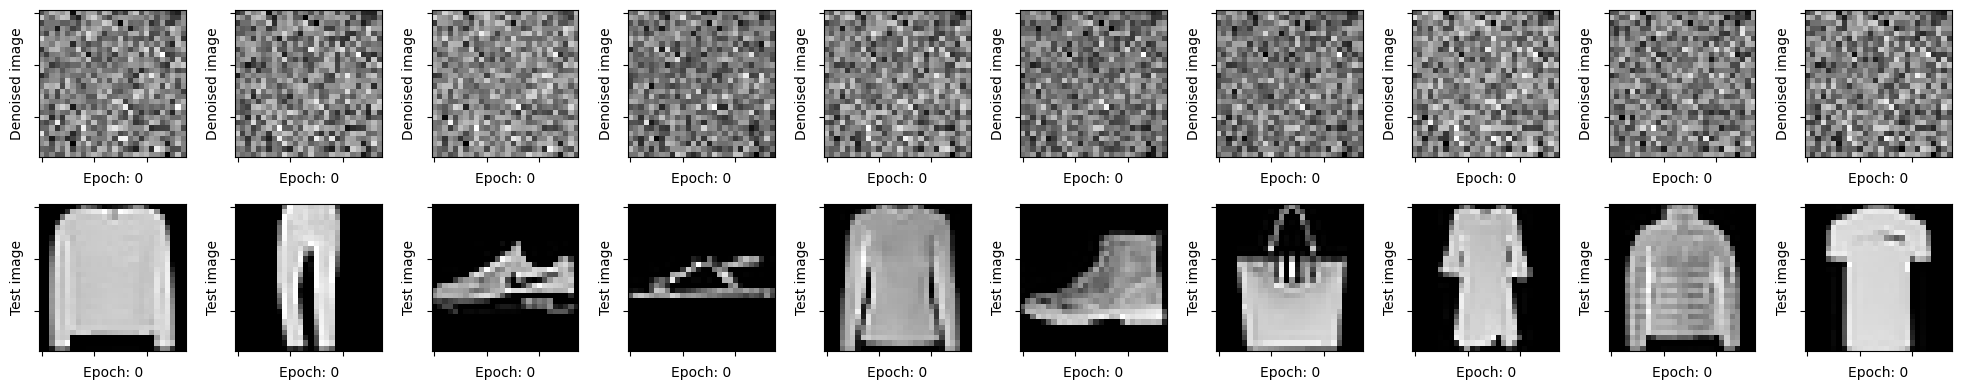

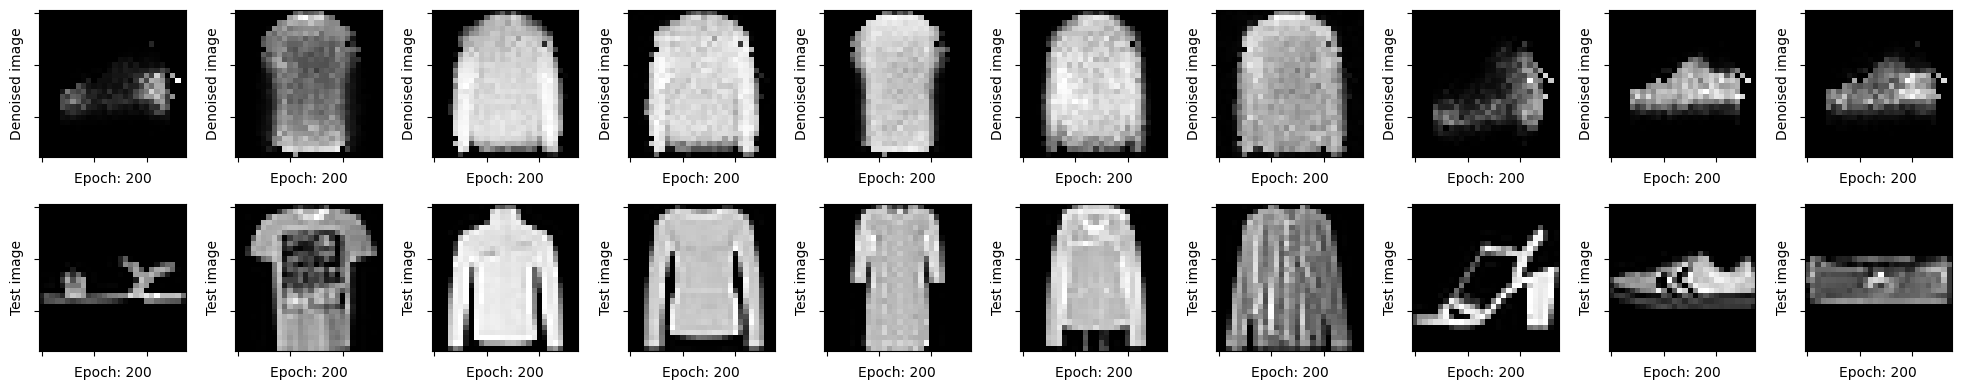

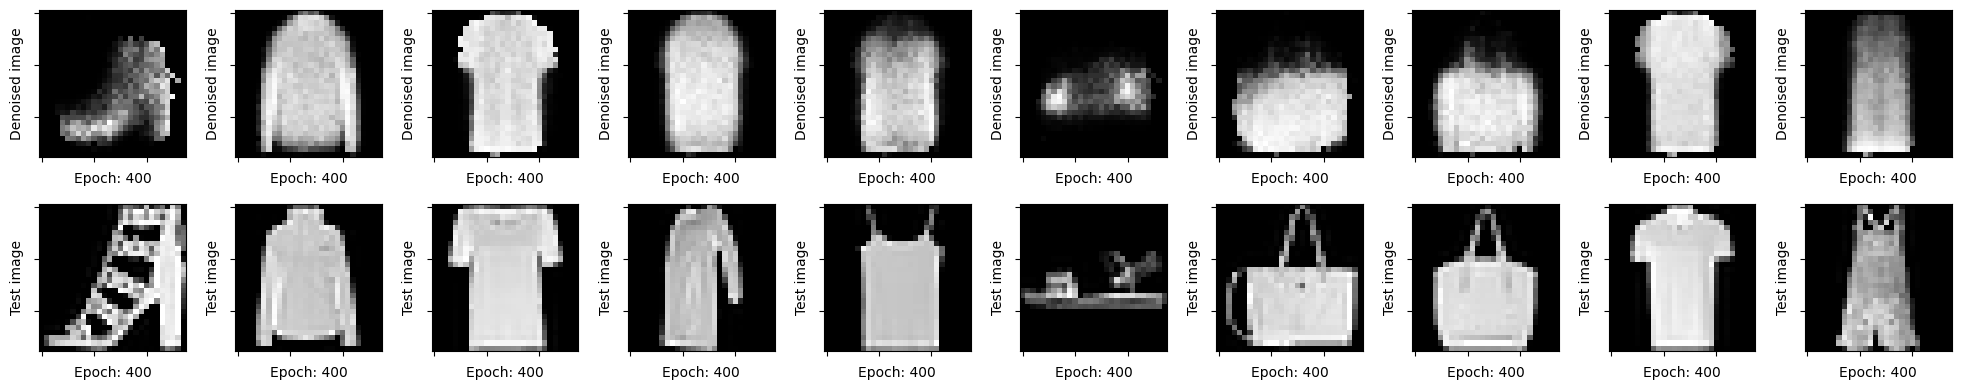

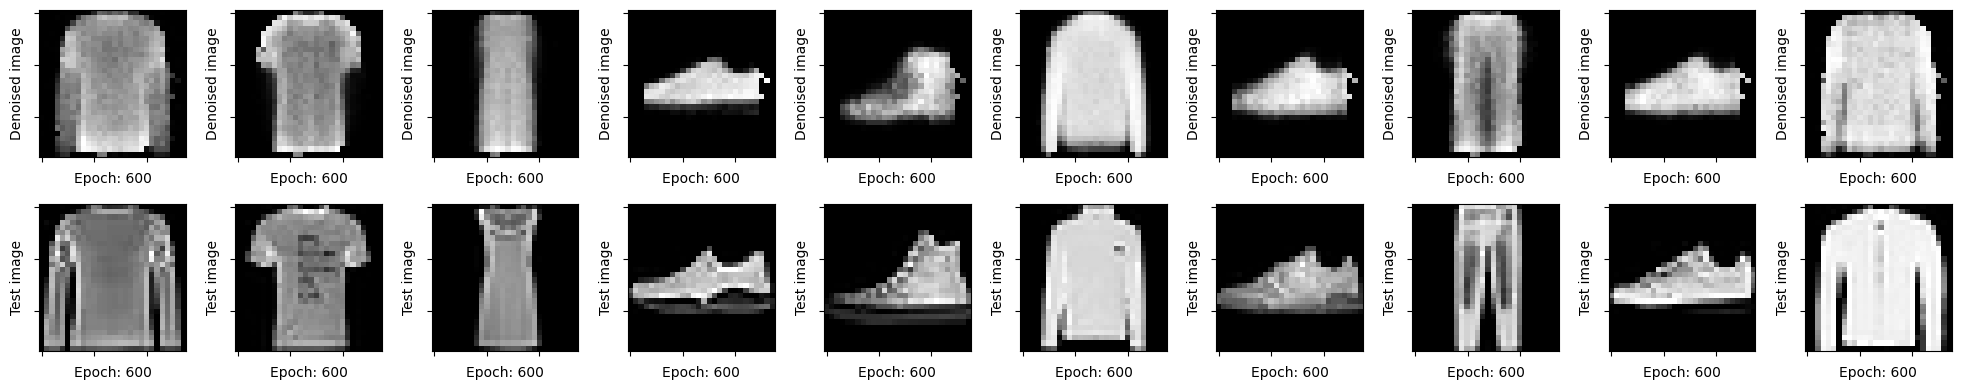

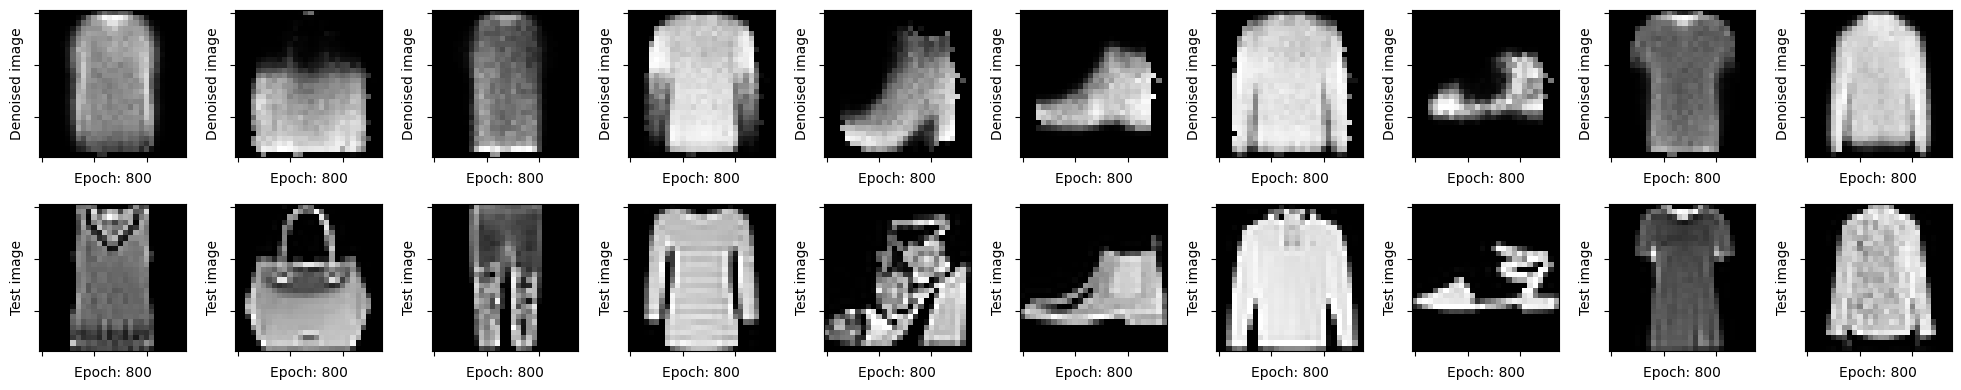

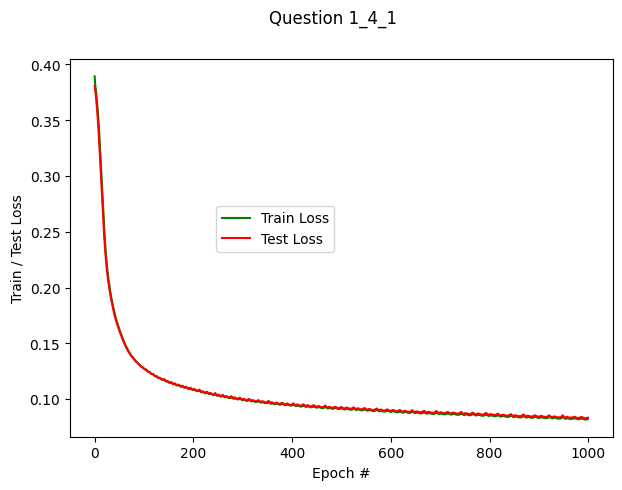

In [ ]:
def main():

  # tf.random.set_seed(50)
  num_Iters = 1000
  adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  train_loss, train_acc, test_loss, test_acc, epoc = [], [], [], [], []
  
  #get processed data from get_data()
  x_train, x_test, x_train_noisy, x_test_noisy = get_data()
  
  # Create tensorflow variables and change datatype to float64
  dt = tf.float32
  x_train = tf.cast(x_train, dt)
  x_test = tf.cast(x_test, dt)
  x_train_noisy = tf.cast(x_train_noisy, dt)
  x_test_noisy = tf.cast(x_test_noisy, dt)

  #when using RELU, multiply the weights with sqrt(2/n) to mitigate vanishing/exploding weights for large 'n' - Andrew Ng 
  W1 = tf.Variable(tf.random.normal([128,784]) * tf.sqrt(2/784))
  W2 = tf.Variable(tf.random.normal([64,128]) * tf.sqrt(2/128))
  W3 = tf.Variable(tf.random.normal([32,64]) * tf.sqrt(2/64))
  W4 = tf.Variable(tf.random.normal([64,32]) * tf.sqrt(2/32))
  W5 = tf.Variable(tf.random.normal([128,64]) * tf.sqrt(2/64))
  W6 = tf.Variable(tf.random.normal([784,128]) * tf.sqrt(2/128))
  
  B1 = tf.Variable(tf.zeros([1]))
  B2 = tf.Variable(tf.zeros([1]))
  B3 = tf.Variable(tf.zeros([1]))
  B4 = tf.Variable(tf.zeros([1]))
  B5 = tf.Variable(tf.zeros([1]))
  B6 = tf.Variable(tf.zeros([1]))

  # predicted_y = forward_pass(x_train_noisy, W1, B1, W2, B2, W3, B3, W4, B4, W5, B5, W6, B6)
  # print("the output shape is",predicted_y.shape)
  # mae = mean_absolute_error(predicted_y, x_train) 
  # print("this is mae", mae)
  
  for i in range(num_Iters):
    epoc.append(i)
    with tf.GradientTape() as tape:
      x_denoised = forward_pass(x_train_noisy, W1, B1, W2, B2, W3, B3, W4, B4, W5, B5, W6, B6)
      mae = mean_absolute_error(x_denoised, x_train) 
      train_loss.append(mae)
    gradients = tape.gradient(mae,[W1, W2, W3, W4, W5, W6, B1, B2, B3, B4, B5, B6])

    print("Epoch: {}, Loss: {}".format(i, mae))

    adam_optimizer.apply_gradients(zip(gradients,[W1, W2, W3, W4, W5, W6, B1, B2, B3, B4, B5, B6]))

    #test data - validate
    x_test_denoised = forward_pass(x_test_noisy,  W1, B1, W2, B2, W3, B3, W4, B4, W5, B5, W6, B6)
    loss = mean_absolute_error(x_test_denoised, x_test)
    test_loss.append(loss)

    if i%200 == 0:
      display(x_test_denoised,x_test,i)


# plotting four curves - https://stackoverflow.com/questions/67248885/plot-four-curve-with-one-x-axis-and-2-different-y-axis-on-the-same-plot-in-pytho
  fig = plt.figure(figsize=(7,5))
  fig.suptitle("Question 1_4_1")
  ax1 = fig.add_subplot()
  ax1.plot(epoc,train_loss, color='green', label = 'Train Loss')
  ax1.plot(epoc,test_loss, color='red', label = 'Test Loss')
  ax1.set_ylabel("Train / Test Loss")
  ax1.set_xlabel("Epoch #")
  ax1.legend(loc ='upper right', bbox_to_anchor=(0.5, 0.63))
  plt.show()
  
if __name__ == "__main__":
    main()